<a href="https://colab.research.google.com/github/nikeshgamal24/House-Price-Prediction-Project/blob/main/House_Price_Prediction_Project_KC_HOUSE_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [78]:
## Data Collection
df = pd.read_csv("kc_house_data.csv")

In [79]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [81]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [82]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [83]:
## checking for duplicate records
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
21608,False
21609,False
21610,False
21611,False


In [84]:
## checking for duplicate records
df[df.duplicated()]  ## no duplicate records

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [85]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [86]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [88]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


### Feature Engineering

#### Feature Extraction

In [89]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_feature

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [90]:
len(numerical_feature)

20

In [91]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_feature

['date']

In [92]:
len(categorical_feature)

1

In [93]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique())<25]
discrete_feature

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [94]:
len(discrete_feature)

6

In [95]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
continuous_feature

['id',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [96]:
len(continuous_feature)

14

In [97]:
print(f"Numerical Features: {numerical_feature}")
print(f"Length of numerical features: {len(numerical_feature)}")
print(f"Categorical Features: {categorical_feature} ")
print(f"Length of categorical feature: {len(categorical_feature)}")
print(f"Discrete Features: {discrete_feature}")
print(f"Length of discrete feature: {len(discrete_feature)}")
print(f"Continuous Features: {continuous_feature}")
print(f"Length of continuous featue: {len(continuous_feature)}")


Numerical Features: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Length of numerical features: 20
Categorical Features: ['date'] 
Length of categorical feature: 1
Discrete Features: ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
Length of discrete feature: 6
Continuous Features: ['id', 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Length of continuous featue: 14


In [98]:
df = df.drop('date',axis=1)

In [99]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [100]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [103]:

### Independent Feature and Dependent Feature
## independent feature
X = df.drop(["price"],axis=1)


In [104]:
X.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [106]:
## dependent feature
y = df["price"]
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [107]:
## independent feature
y = df["price"]
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [108]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape
y_train.shape,y_test.shape

((17290,), (4323,))

In [109]:
## Create Column Transformer with 3 types of transformer i.e. StandardScaler() , OneHotEncoder(), ColumnTransformer()
### numerical feature from independent features
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns



In [110]:
num_features

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [111]:
cat_features

Index([], dtype='object')

In [113]:
## transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

oh_encoder = OneHotEncoder(drop='first')
std_scaler = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("StandardScaler",std_scaler,num_features)
    ]
)

In [114]:
preprocessor

ColumnTransformer(transformers=[('StandardScaler', StandardScaler(),
                                 Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object'))])

In [115]:
## applying the transformation to the training dataset (fit_transform)
# Fit the preprocessor ONLY on the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the *fitted* preprocessor (do NOT fit again!)
X_test_transformed = preprocessor.transform(X_test)

In [116]:
temp_df=pd.DataFrame(X_train_transformed)

In [117]:
temp_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.005557,0.007887,-0.012010,-0.138542,0.018736,-0.007907,0.007141,-0.026996,0.010694,-0.007584,-0.010635,0.028905,-0.020092,-0.009243,-0.008768,0.021854,-0.003013,-0.142291
1,0.005557,1.000000,0.515266,0.575048,0.031054,0.172962,-0.010044,0.070176,0.028185,0.353513,0.474386,0.300806,0.148824,0.020915,-0.152708,-0.013322,0.126010,0.386209,0.023625
2,0.007887,0.515266,1.000000,0.752745,0.086344,0.504126,0.063145,0.179657,-0.124764,0.664407,0.683303,0.277038,0.505649,0.051332,-0.202922,0.026761,0.221848,0.563438,0.079958
3,-0.012010,0.575048,0.752745,1.000000,0.176264,0.348917,0.095543,0.275554,-0.056163,0.760652,0.875820,0.427831,0.315848,0.054880,-0.203540,0.053920,0.242701,0.754904,0.174895
4,-0.138542,0.031054,0.086344,0.176264,1.000000,-0.004670,0.027354,0.061524,-0.010531,0.116535,0.187159,0.014017,0.051956,0.015425,-0.135121,-0.078886,0.240164,0.151801,0.734932
5,0.018736,0.172962,0.504126,0.348917,-0.004670,1.000000,0.018441,0.027260,-0.268652,0.457274,0.518214,-0.248916,0.495168,0.005480,-0.054722,0.054014,0.121500,0.271551,-0.012202
6,-0.007907,-0.010044,0.063145,0.095543,0.027354,0.018441,1.000000,0.390616,0.017313,0.070820,0.063283,0.079072,-0.030817,0.088378,0.026815,-0.018784,-0.043843,0.075609,0.032785
7,0.007141,0.070176,0.179657,0.275554,0.061524,0.027260,0.390616,1.000000,0.048571,0.244440,0.159612,0.270938,-0.058776,0.100026,0.084540,0.005750,-0.086336,0.276378,0.063760
8,-0.026996,0.028185,-0.124764,-0.056163,-0.010531,-0.268652,0.017313,0.048571,1.000000,-0.143680,-0.158199,0.180120,-0.361492,-0.061802,0.003919,-0.018660,-0.109123,-0.094194,-0.006322
9,0.010694,0.353513,0.664407,0.760652,0.116535,0.457274,0.070820,0.244440,-0.143680,1.000000,0.752990,0.162885,0.447234,0.013731,-0.182515,0.118808,0.197489,0.707253,0.114337


<Axes: >

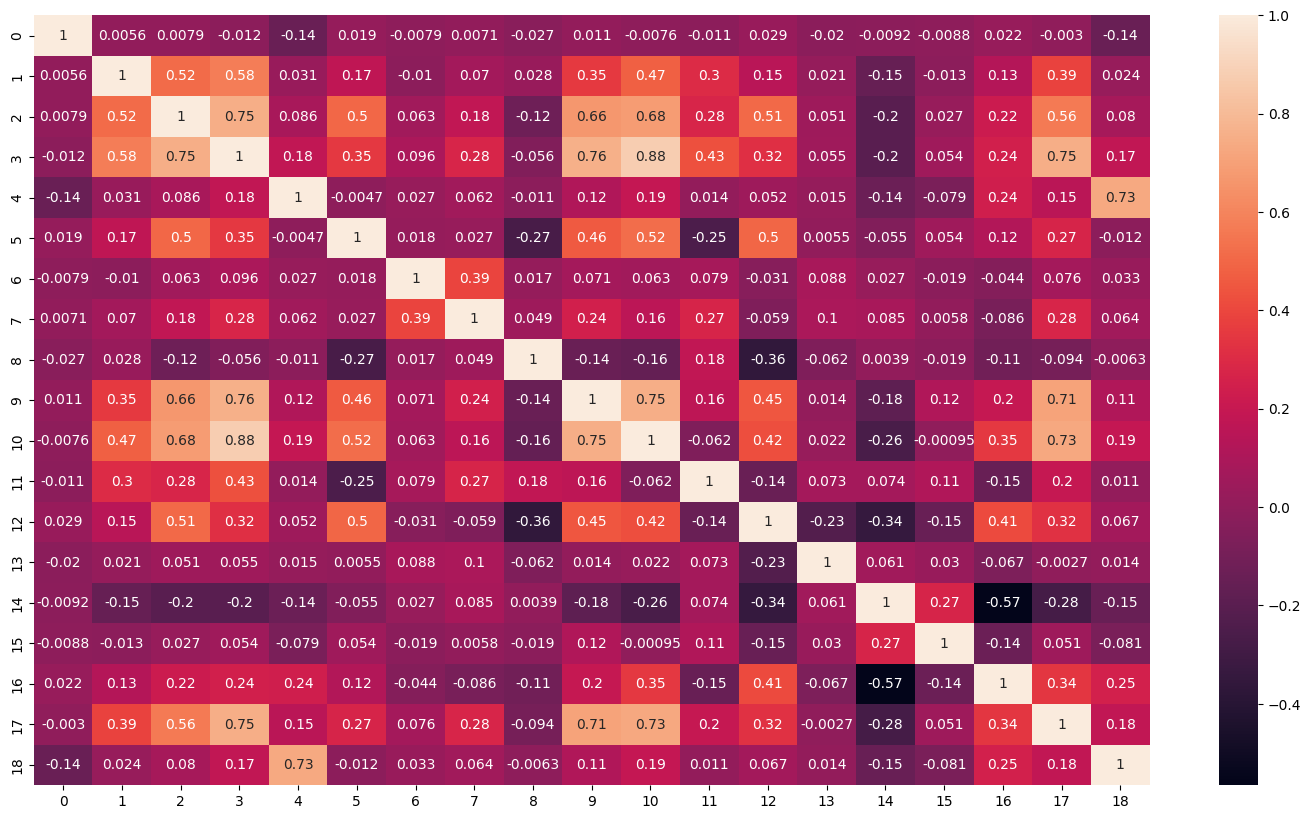

In [119]:
plt.figure(figsize=(18,10))
sns.heatmap(temp_df.corr(),annot=True)

In [120]:
## Model Training
### Model Evaluation

In [121]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,recall_score,precision_score


In [122]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [123]:
## create dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression":Ridge(),
    "Lasso Regression":Lasso(),
    "Kneighbor Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

## looping for each model ,predicting the values and model evaluation
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed,y_train) ## model training

    ## Make Predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    # print(y_train_pred)
    # print(y_test_pred)

    ## model evaluation on train dataset
    model_train_mae,model_train_rmse, model_train_r2= evaluate_model(y_train,y_train_pred)

    ## model evaluation on test dataset
    model_test_mae,model_test_rmse, model_test_r2= evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 198235.8750
- Mean Absolute Error: 125042.2552
- R2 Score: 0.6992
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 212520.1585
- Mean Absolute Error: 127474.1030
- R2 Score: 0.7012


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 198235.8755
- Mean Absolute Error: 125040.1332
- R2 Score: 0.6992
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 212520.7714
- Mean Absolute Error: 127472.1517
- R2 Score: 0.7012


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 198235.8751
- Mean Absolute Error: 125042.1619
- R2 Score: 0.6992
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 212520.2502
- Mean Absolute Error: 127474.0888
- R2 Score: 0.7012


Kneighbor Regressor
Model performance for Training set
- Root Mean Squared Error:

In [124]:
## Hyper parameter tunning
### RandomizedCV
#Initialize few parameter for Hyperparamter tuning
dt_params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30], # 'None' means unlimited depth
    'min_samples_split': [2, 5, 10, 20],
    # 'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2', 0.8, 0.5], # 0.8 means 80% of features
    # 'max_leaf_nodes': [None, 10, 20, 30, 50],
    # 'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.05, 0.1,0.0005]
}

rf_params={
    'n_estimators': [100, 200, 300, 500], # Number of trees in the forest
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 10, 20, 30], # None means unlimited depth
    'min_samples_split': [2, 5, 10],
    'max_features': [1.0, 'sqrt', 'log2', 0.8], # For Random Forest, 'sqrt' (or 0.33) is often a good default
    # 'bootstrap': [True, False], # Whether bootstrap samples are used when building trees
    # 'oob_score': [False], # Usually set to True if you want to use OOB samples to estimate the generalization accuracy
    # 'ccp_alpha': [0.0, 0.001, 0.01], # Cost-Complexity Pruning
    # 'max_samples': [None, 0.7, 0.9], # If bootstrap=True, this sets the fraction of samples to draw. Not always tuned initially.
    # 'max_leaf_nodes': [None, 20, 50], # Less common to tune heavily if max_depth is tuned.
    # 'min_impurity_decrease': [0.0, 0.01], # Less common to tune heavily if others are used for regularization.
}

adb_params={
    'n_estimators': [50, 100, 200, 300, 500], # Number of boosting stages (weak learners)
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0], # Shrinks the contribution of each estimator
    'loss': ['linear', 'square', 'exponential'], # Type of loss function to use
    # 'estimator': [ # The base estimator. Often a DecisionTreeRegressor.
    #     # Define base estimators with various depths. Shallow trees are common for AdaBoost.
    #     DecisionTreeRegressor(max_depth=1), # Very common: "stumps"
    #     DecisionTreeRegressor(max_depth=2),
    #     DecisionTreeRegressor(max_depth=3),
    #     # You could also try other simple models here, but Decision Trees are standard.
    # ],
}

In [125]:
# Models list for Hyperparameter tuning
randomcv_models=[
    ("Decision Tree",DecisionTreeRegressor(),dt_params),
    ("Random Forest",RandomForestRegressor(),rf_params),
    ("Ada Boost",AdaBoostRegressor(),adb_params)
]

In [ ]:
### Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        n_jobs=-1,
    )
    random.fit(X_train_transformed,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-------------------Best Paramters for {model_name}-----------------------------")
    print(model_param[model_name])

In [ ]:
## create dictionary of models
models = {
    "Decision Tree Regressor":DecisionTreeRegressor(splitter = 'best',
                                                    min_samples_split = 20,
                                                    max_features = 0.5,
                                                    max_depth = 20,
                                                    criterion = 'squared_error',
                                                    ccp_alpha = 0.0),
    "Random Forest Regressor":RandomForestRegressor(
                                                    n_estimators = 100,
                                                    min_samples_split = 5,
                                                    max_features = 'log2',
                                                    max_depth = 10,
                                                    criterion = 'absolute_error',
                                                   ),
    "AdaBoost Regressor": AdaBoostRegressor(
        n_estimators = 200, loss  = 'exponential', learning_rate = 0.05
    )
}

## looping for each model ,predicting the values and model evaluation
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed,y_train) ## model training

    ## Make Predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    # print(y_train_pred)
    # print(y_test_pred)

    ## model evaluation on train dataset
    model_train_mae,model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)

    ## model evaluation on test dataset
    model_test_mae,model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Decision Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 967222.8842
- Mean Absolute Error: 689898.7663
- R2 Score: 0.6966
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1769953.0119
- Mean Absolute Error: 1313827.3008
- R2 Score: 0.3802


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 714196.1512
- Mean Absolute Error: 490359.6162
- R2 Score: 0.8346
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1424757.3594
- Mean Absolute Error: 1013514.5486
- R2 Score: 0.5984


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 977794.7686
- Mean Absolute Error: 759522.5184
- R2 Score: 0.6899
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1532215.0509
- Mean Absolute Error: 1167599.7249
- R2 Score: 0.5355


